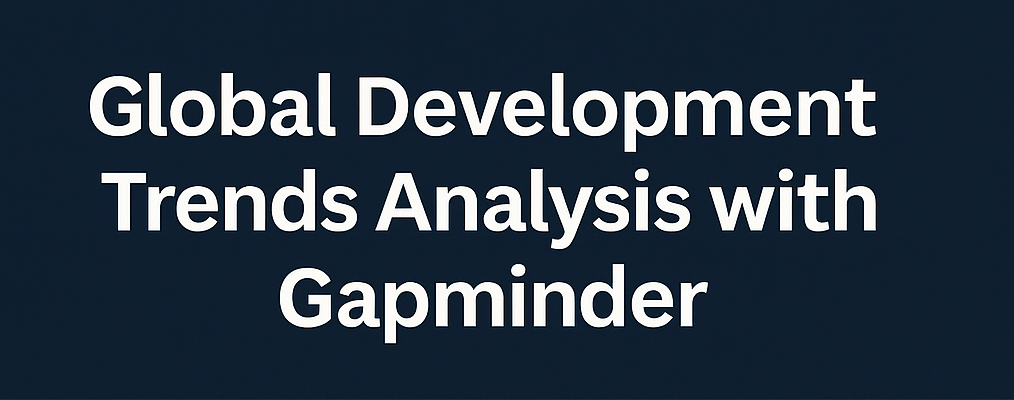

# Analyzing Global Development Trends with Gapminder Data

This notebook explores the Gapminder dataset, which provides a rich collection of data on countries over time, focusing on key development indicators such as life expectancy, population, and GDP per capita. The primary goals of this analysis are to:

- Visualize and understand the trends and relationships between these critical metrics.
- Identify patterns in global development across different continents and countries.
- Apply basic statistical models to predict future trends based on historical data.

Brief context: what the dataset is, why it matters.

Your project goals (exploratory analysis, visualization, regression, insights).

# Data Loading & Initial Exploration


In [3]:
path = 'https://raw.githubusercontent.com/prof-apartida/data-exercises/refs/heads/main/gapminderDataFiveYear.csv'

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Overview
We start by loading the dataset and inspecting the first few rows.


In [5]:
# Load the dataset from the path
df = pd.read_csv(path)

# Display the first 5 rows
print(df.head())

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106


## Inspecting Data Types & Missing Values
We check the column types and confirm there are no missing values.


In [ ]:
# Display column types and non-null counts
print(df.info())

# Inspect data types
print("Data types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB
None
Data types:
country       object
year           int64
pop          float64
continent     object
lifeExp      float64
gdpPercap    float64
dtype: object

Missing values per column:
country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64


## Summary Statistics
Finally, we review summary statistics for the numeric columns.


In [ ]:
# Display summary statistics
print(df.describe())

             year           pop      lifeExp      gdpPercap
count  1704.00000  1.704000e+03  1704.000000    1704.000000
mean   1979.50000  2.960121e+07    59.474439    7215.327081
std      17.26533  1.061579e+08    12.917107    9857.454543
min    1952.00000  6.001100e+04    23.599000     241.165876
25%    1965.75000  2.793664e+06    48.198000    1202.060309
50%    1979.50000  7.023596e+06    60.712500    3531.846988
75%    1993.25000  1.958522e+07    70.845500    9325.462346
max    2007.00000  1.318683e+09    82.603000  113523.132900


# Exploratory Data Analysis

Distribution of Key Variables
- GDP per capita
- Life expectancy
- Population


## GDP per capita

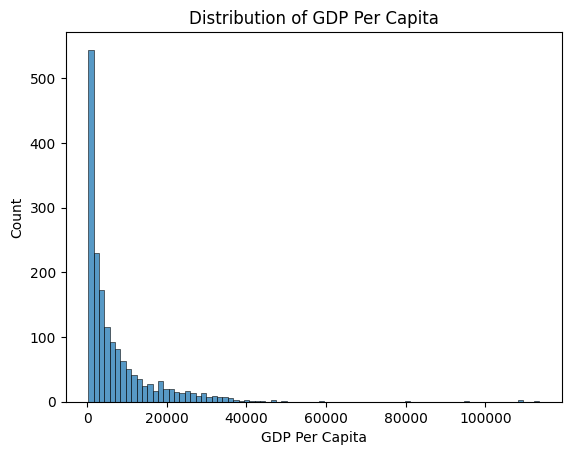

In [ ]:
# Distribution (Histogram) of GDP per capita
sns.histplot(df['gdpPercap'], kde=False)
plt.title("Distribution of GDP Per Capita")
plt.xlabel("GDP Per Capita")
plt.ylabel("Count")
plt.show()

## Life expectancy

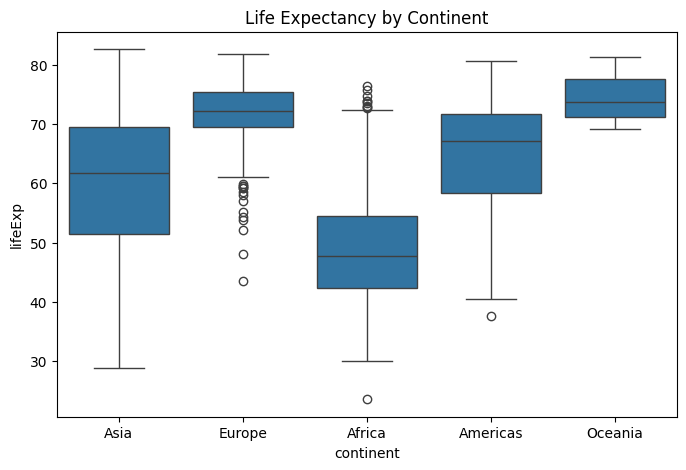

In [ ]:
# Boxplot of Life Expectancy by Continent
plt.figure(figsize=(8, 5))
sns.boxplot(x='continent', y='lifeExp', data=df)
plt.title("Life Expectancy by Continent")
plt.show()


## Population

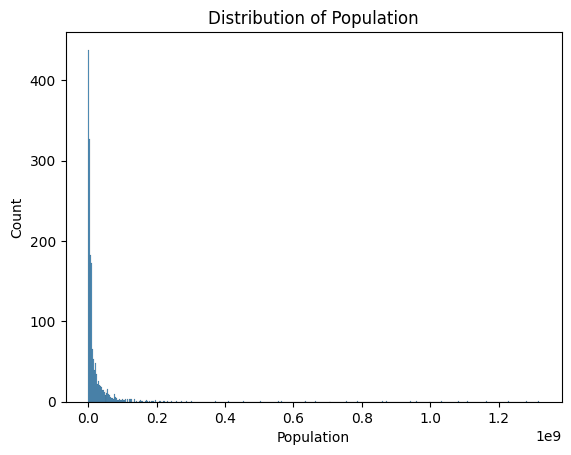

In [ ]:
# Distribution (Histogram) of Population
sns.histplot(df['pop'], kde=False)
plt.title("Distribution of Population")
plt.xlabel("Population")
plt.ylabel("Count")
plt.show()

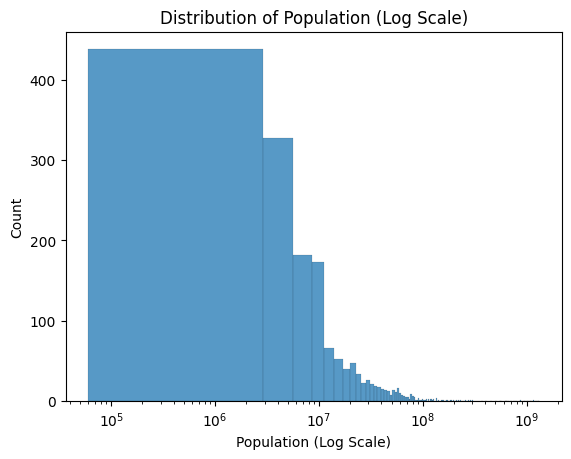

In [ ]:
# Distribution (Histogram) of Population with log scale
sns.histplot(df['pop'], kde=False)
plt.xscale('log')  # Use a log scale for the x-axis
plt.title("Distribution of Population (Log Scale)")
plt.xlabel("Population (Log Scale)")
plt.ylabel("Count")
plt.show()

## Relationships Between Variables
- Correlation matrix
- GDP vs. Life Expectancy scatter/bubble plots

We compute a correlation matrix to examine relationships among population, GDP per capita, and life expectancy

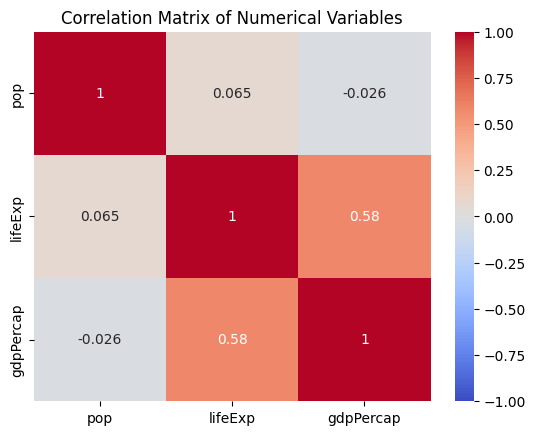

In [ ]:
# Correlation Matrix to find relationship between features

corr = df[['pop', 'lifeExp', 'gdpPercap']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


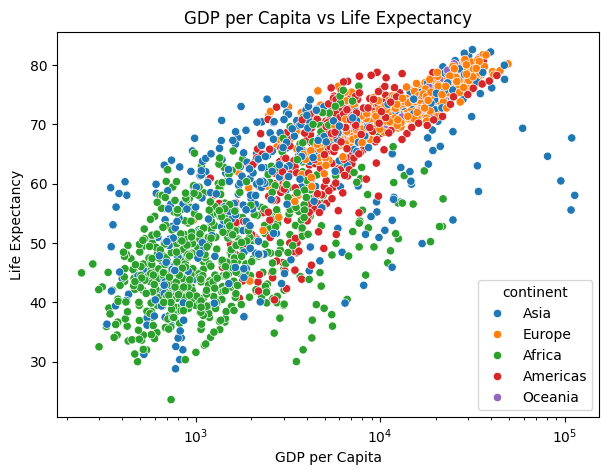

In [6]:
# Plot scatter plot of GDP per Capita vs Life Expectancy
plt.figure(figsize=(7, 5))
sns.scatterplot(x='gdpPercap', y='lifeExp', hue='continent', data=df)
plt.title("GDP per Capita vs Life Expectancy")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.xscale('log')  # Often we log-transform GDP to better visualize
plt.show()


This scatter plot shows the relationship between GDP per capita and life expectancy, with continents distinguished by color

# Data Visualization & Storytelling

**To uncover global development patterns, we apply multiple visualization techniques such as boxplots, line charts, bubble plots, and faceted charts. These help illustrate both distributions and trends across time, regions, and populations**

## Boxplots


**Comparing Life Expectancy Across Continents**


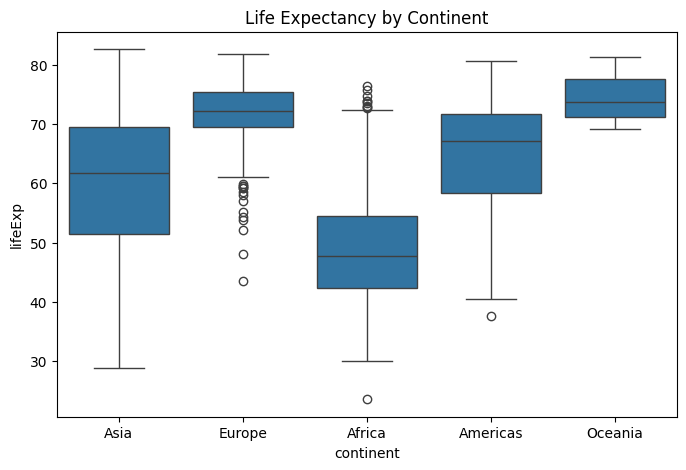

In [ ]:
# Boxplot of Life Expectancy by Continent
plt.figure(figsize=(8, 5))
sns.boxplot(x='continent', y='lifeExp', data=df)
plt.title("Life Expectancy by Continent")
plt.show()

This chart compares the distribution of life expectancy across continents. It highlights disparities in health outcomes, showing that Africa consistently lags behind other regions while Europe and Oceania lead in life expectancy

## Line Charts


###  Life Expectancy Over Time

We track average life expectancy across continents over time (since 1952), revealing consistent improvements globally

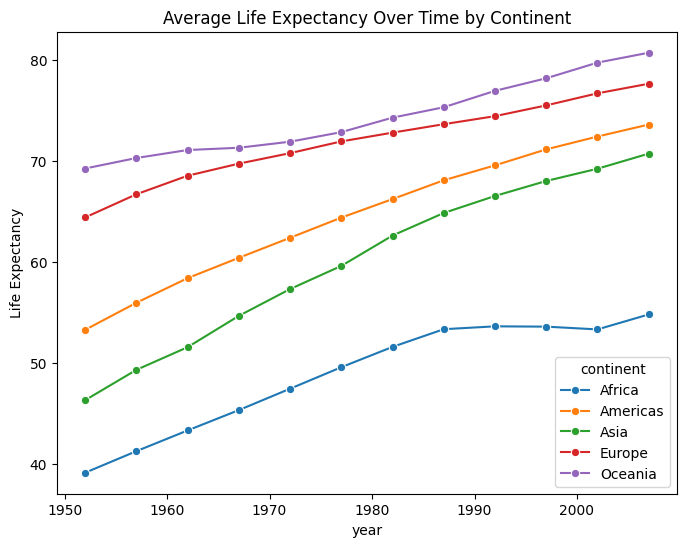

In [ ]:
# Compute the mean lifeExp by year and continent
avg_life_by_year_cont = df.groupby(['year', 'continent'])['lifeExp'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(
    x='year',
    y='lifeExp',
    hue='continent',
    data=avg_life_by_year_cont,
    marker='o'
)
plt.title("Average Life Expectancy Over Time by Continent")
plt.ylabel("Life Expectancy")
plt.show()


Here, we calculate and display the average life expectancy by continent to get a preliminary overview of the data

In [ ]:
# Average life expectancy by continent
avg_life_by_cont = df.groupby('continent')['lifeExp'].mean()
print("Average life expectancy by continent:")
print(avg_life_by_cont)

# Average GDP per capita by year
avg_gdp_by_year = df.groupby('year')['gdpPercap'].mean()
print("\nAverage GDP per capita by year:")
print(avg_gdp_by_year)


Average life expectancy by continent:
continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

Average GDP per capita by year:
year
1952     3725.276046
1957     4299.408345
1962     4725.812342
1967     5483.653047
1972     6770.082815
1977     7313.166421
1982     7518.901673
1987     7900.920218
1992     8158.608521
1997     9090.175363
2002     9917.848365
2007    11680.071820
Name: gdpPercap, dtype: float64


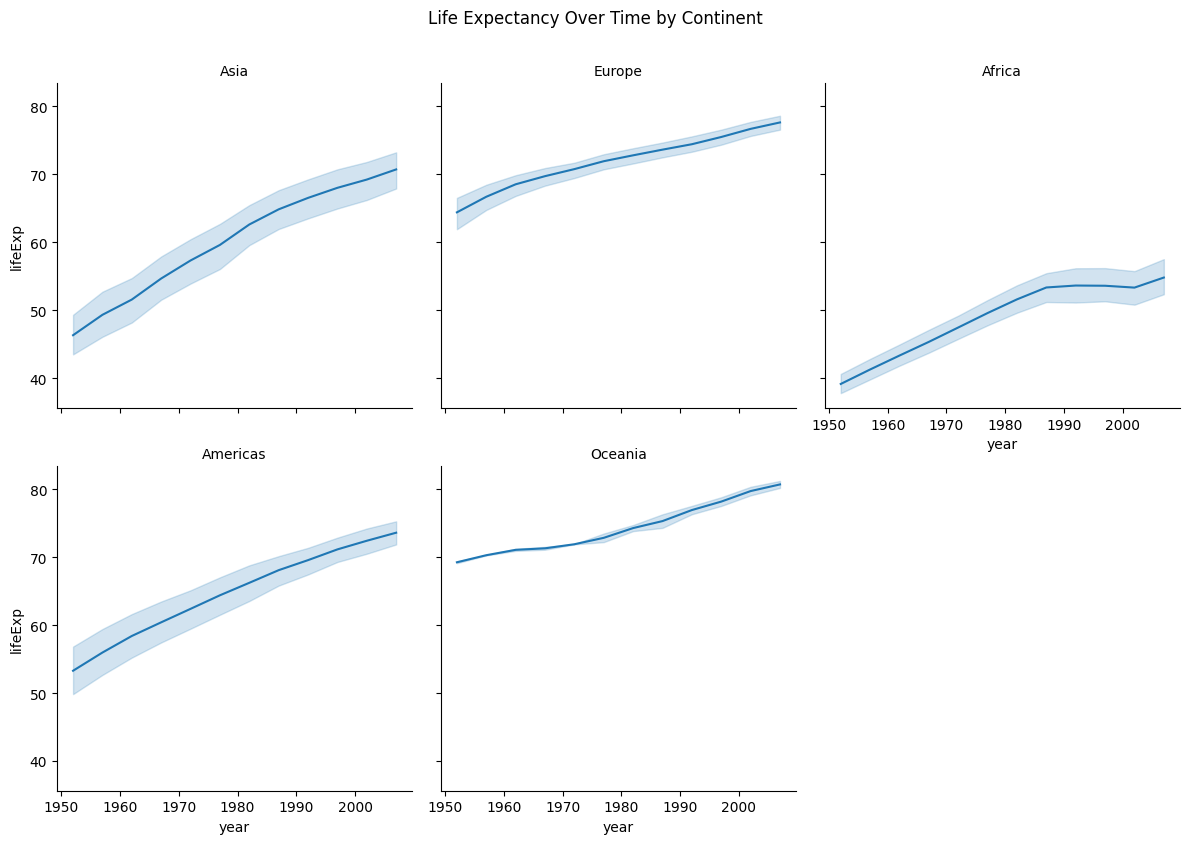

In [ ]:
# FacetGrid by Continent (Trends Over Time)
g = sns.FacetGrid(df, col="continent", col_wrap=3, height=4)
g.map_dataframe(
    sns.lineplot,
    x="year",
    y="lifeExp"
)
g.set_titles("{col_name}")
plt.suptitle("Life Expectancy Over Time by Continent", y=1.05)
plt.show()


Example of a country-level view: Canada’s life expectancy shows steady growth over the decades

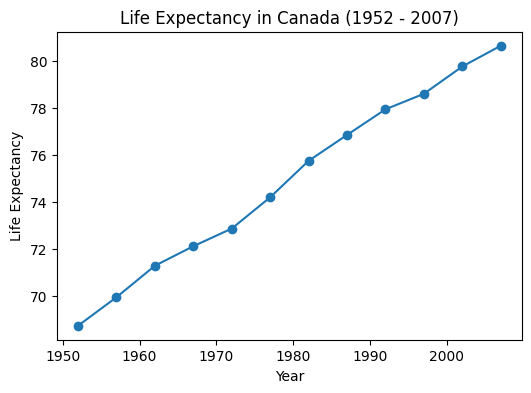

In [ ]:
# Filter for one country, e.g., Canada
canada_df = df[df['country'] == 'Canada']

plt.figure(figsize=(6, 4))
plt.plot(canada_df['year'], canada_df['lifeExp'], marker='o')
plt.title("Life Expectancy in Canada (1952 - 2007)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()


###  Total Population Over Time

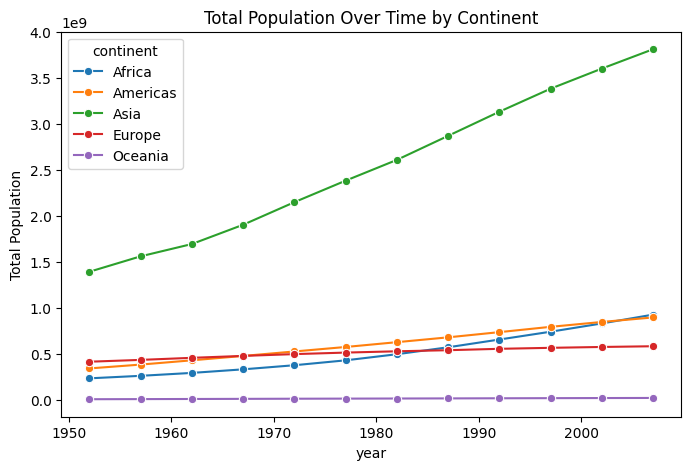

In [ ]:
# Summarize total population by year & continent
pop_by_year_cont = df.groupby(['year', 'continent'])['pop'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=pop_by_year_cont,
    x='year',
    y='pop',
    hue='continent',
    marker='o'
)
plt.title("Total Population Over Time by Continent")
plt.ylabel("Total Population")
plt.show()


Shows the rapid rise in Asia’s population compared to slower growth in Europe and Oceania

###  Average GDP per Capita Over Time

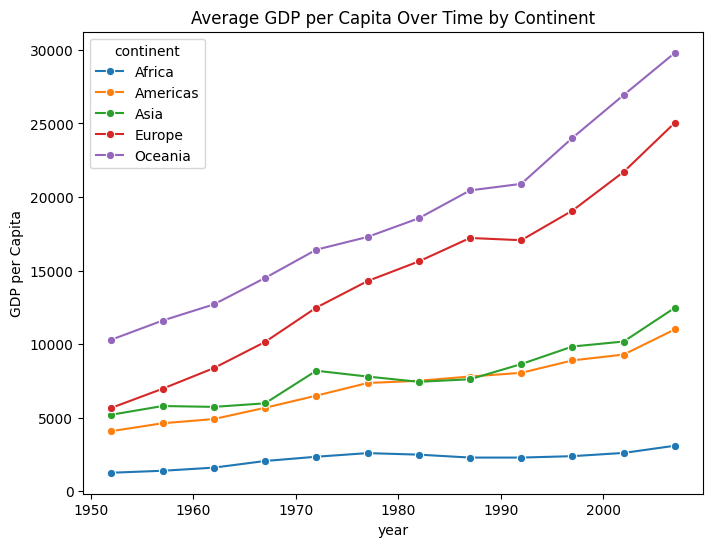

In [ ]:
# Compute the mean gdpPercap by year and continent
avg_gdp_by_year_cont = df.groupby(['year', 'continent'])['gdpPercap'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(
    x='year',
    y='gdpPercap',
    hue='continent',
    data=avg_gdp_by_year_cont,
    marker='o'
)
plt.title("Average GDP per Capita Over Time by Continent")
plt.ylabel("GDP per Capita")
plt.show()

We show how average GDP per capita has evolved by continent, illustrating widening economic gaps betweeen regions

## Bubble Plots


**GDP, Population, and Life Expectancy Combined**  


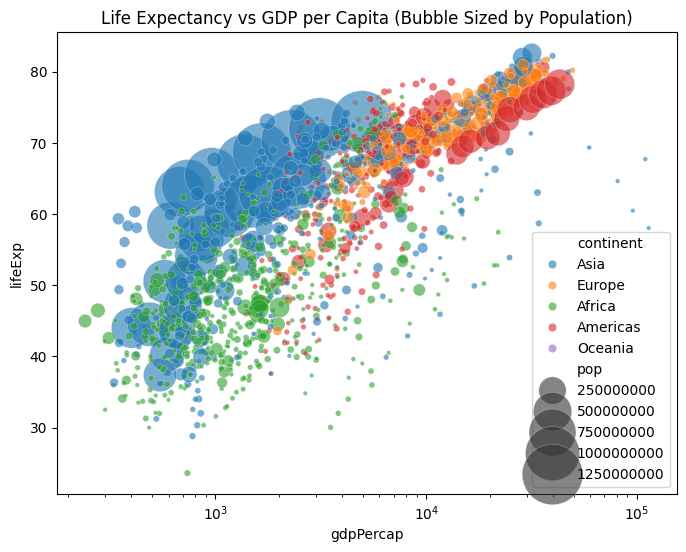

In [ ]:
# Bubble Chart (Life Expectancy vs. GDP per Capita, Bubble-Sized by Population)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='gdpPercap',
    yw='lifeExp',
    size='pop',         # Bubble size is population
    hue='continent',
    alpha=0.6,
    sizes=(10, 2000)    # Adjust min and max bubble size
)
plt.xscale('log')       # Log scale for GDP
plt.title("Life Expectancy vs GDP per Capita (Bubble Sized by Population)")
plt.show()


This chart visualizes the relationship between GDP per capita and life expectancy, with bubble size representing population and color indicating continent. It highlights both economic disparities and population-weighted global development patterns

## Faceted Charts

Regional Comparisons


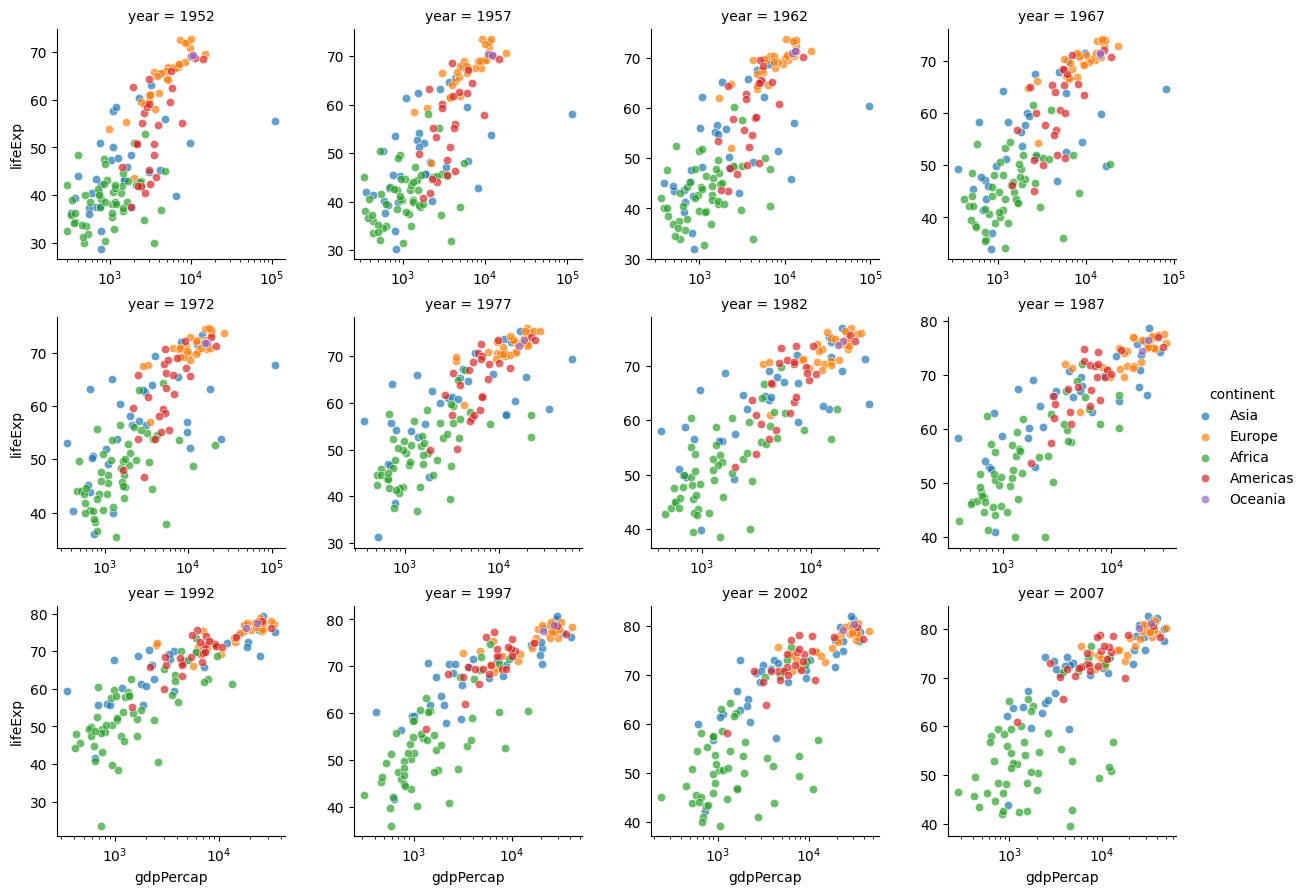

In [ ]:
# Faceted Scatter Plots (by Year)
# Subsample or use entire data to create one facet per year
g = sns.FacetGrid(df, col="year", hue="continent", col_wrap=4, height=3, sharex=False, sharey=False)
g.map(sns.scatterplot, "gdpPercap", "lifeExp", alpha=0.7)
g.set(xscale="log")
g.add_legend()
plt.show()


## Clustering Analysis

K-Means on GDP vs Life Expectancy

We apply K-Means clustering to group countries by GDP per capita and life expectancy, uncovering global development patterns

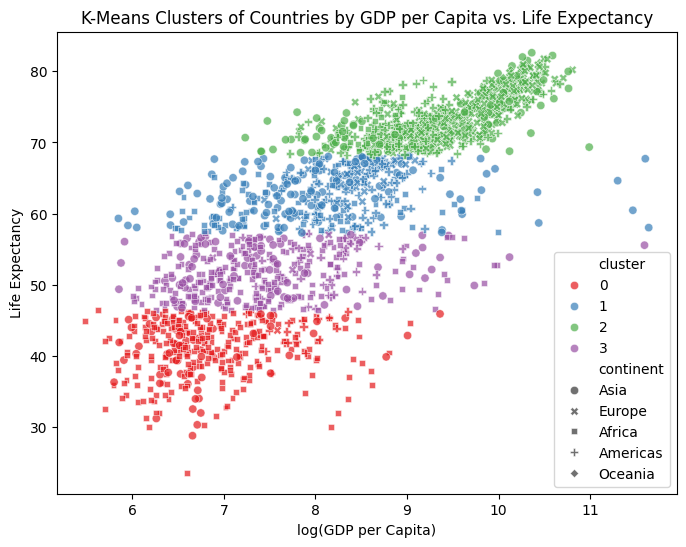

In [7]:
from sklearn.cluster import KMeans

# 1. Select columns & clean
df_cluster = df[['continent', 'lifeExp', 'gdpPercap']].dropna().copy()

# 2. Log-transform gdpPercap to reduce skew
df_cluster['gdpPercap_log'] = np.log(df_cluster['gdpPercap'])

# 3. Fit K-Means with 4 clusters (tweak n_clusters as you like)
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster[['gdpPercap_log', 'lifeExp']])

# 4A. Single scatter plot (color by cluster, style by continent)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_cluster,
    x='gdpPercap_log',
    y='lifeExp',
    hue='cluster',        # color by cluster
    style='continent',    # optional: different marker style by continent
    palette='Set1',
    alpha=0.7
)
plt.xlabel("log(GDP per Capita)")
plt.ylabel("Life Expectancy")
plt.title("K-Means Clusters of Countries by GDP per Capita vs. Life Expectancy")
plt.show()

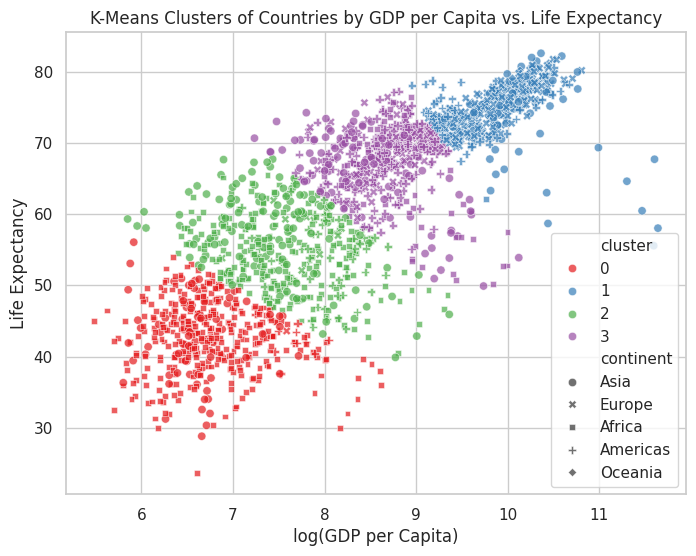

In [26]:
# Scaled Features for K-Means
from sklearn.preprocessing import StandardScaler

# Select features
df_cluster = df[['continent','lifeExp','gdpPercap']].dropna().copy()
df_cluster['gdpPercap_log'] = np.log(df_cluster['gdpPercap'])

# Scale features for K-Means
X = StandardScaler().fit_transform(df_cluster[['gdpPercap_log','lifeExp']])

# Fit K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df_cluster['cluster'] = kmeans.fit_predict(X)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_cluster,
    x='gdpPercap_log',
    y='lifeExp',
    hue='cluster',
    style='continent',
    palette='Set1',
    alpha=0.7
)
plt.xlabel("log(GDP per Capita)")
plt.ylabel("Life Expectancy")
plt.title("K-Means Clusters of Countries by GDP per Capita vs. Life Expectancy")
plt.show()


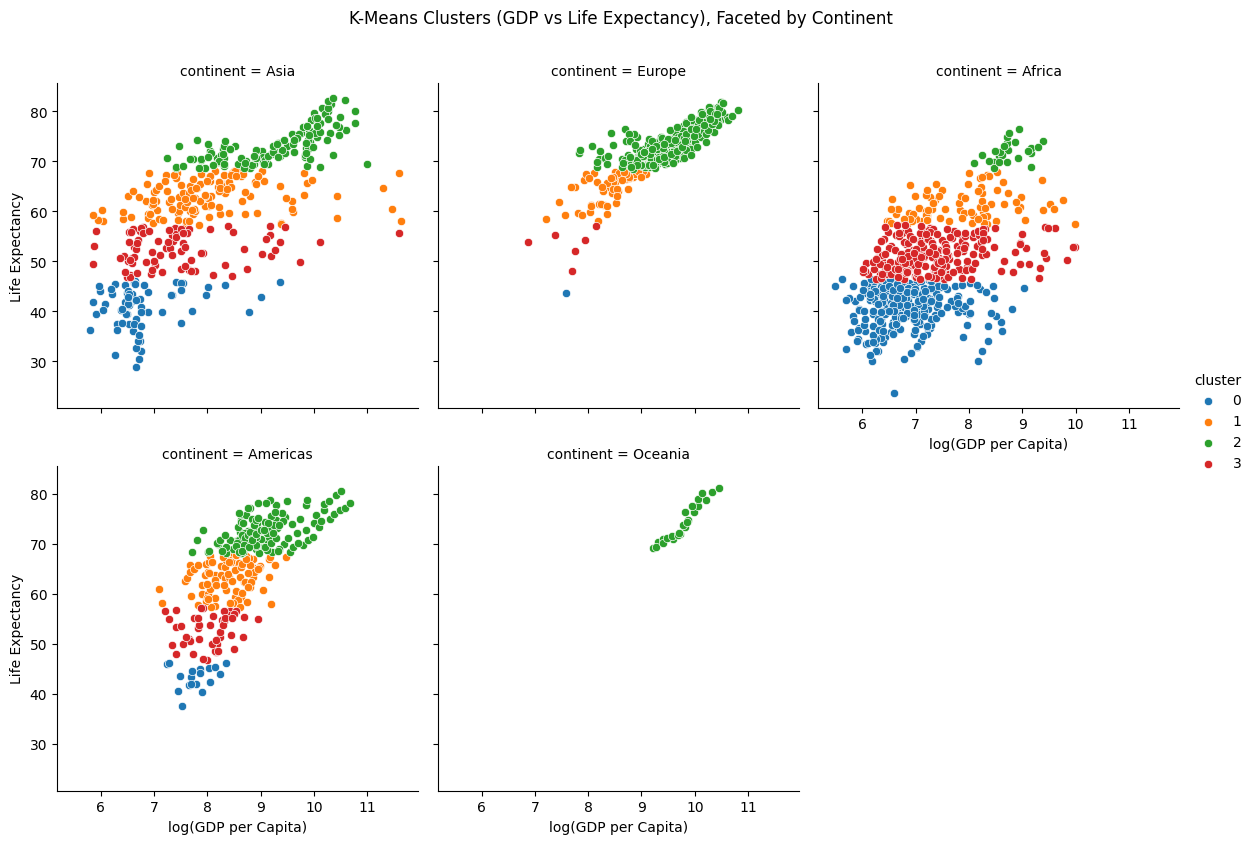

In [ ]:
# 4B. Facet by continent to see cluster distribution within each continent
g = sns.FacetGrid(df_cluster, col='continent', hue='cluster', col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, 'gdpPercap_log', 'lifeExp')
g.add_legend()
g.set_axis_labels("log(GDP per Capita)", "Life Expectancy")
g.fig.suptitle("K-Means Clusters (GDP vs Life Expectancy), Faceted by Continent", y=1.05)
plt.show()


In [14]:
# --- Imports ---
from sklearn.metrics import silhouette_score

# Styling
sns.set(style="whitegrid")  # subtle baseline
CB_PALETTE = ["#0072B2","#D55E00","#009E73","#CC79A7","#E69F00","#56B4E9","#F0E442"]  # colorblind-friendly

# --- Utility: build clustering dataset ---
def build_df_cluster(df, mode="single_year", year=1952):
    """
    mode:
      - 'single_year': keep one year (e.g., 2007)
      - 'latest_per_country': keep latest year per country
    returns df_cluster with columns: ['country','continent','lifeExp','gdpPercap','gdpPercap_log']
    """
    if mode == "single_year":
        data = df[df["year"] == year].copy()
    elif mode == "latest_per_country":
        idx = df.groupby("country")["year"].idxmax()
        data = df.loc[idx].copy()
    else:
        raise ValueError("mode must be 'single_year' or 'latest_per_country'")

    cols = ["country","continent","lifeExp","gdpPercap"]
    df_cluster = data[cols].dropna().copy()
    df_cluster["gdpPercap_log"] = np.log(df_cluster["gdpPercap"].clip(lower=1))
    return df_cluster

# --- Utility: fit KMeans with scaling and report metrics ---
def fit_kmeans(df_cluster, n_clusters=4, features=("gdpPercap_log","lifeExp"), random_state=42):
    X = df_cluster[list(features)].to_numpy()
    Xs = StandardScaler().fit_transform(X)  # good practice for distance-based models

    km = KMeans(n_clusters=n_clusters, n_init="auto", random_state=random_state)
    labels = km.fit_predict(Xs)

    sil = silhouette_score(Xs, labels) if n_clusters > 1 else np.nan
    df_out = df_cluster.copy()
    df_out["cluster"] = labels
    return df_out, km, sil

# --- Plot: overall scatter + faceted by continent ---
def plot_clusters(df_clust, title_prefix="K-Means Clusters"):
    # 1) Overall scatter
    plt.figure(figsize=(7.5,6), dpi=120)
    ax = sns.scatterplot(
        data=df_clust, x="gdpPercap_log", y="lifeExp",
        hue="cluster", palette=CB_PALETTE, alpha=0.75, edgecolor="none"
    )
    ax.set_xlabel("log(GDP per Capita)")
    ax.set_ylabel("Life Expectancy")
    ax.set_title(f"{title_prefix}: Overall")
    sns.move_legend(ax, "lower right", title="Cluster", frameon=True)
    plt.tight_layout()
    plt.show()

    # Fix shared axes so facets are comparable
    x_min, x_max = df_clust["gdpPercap_log"].min(), df_clust["gdpPercap_log"].max()
    y_min, y_max = df_clust["lifeExp"].min(), df_clust["lifeExp"].max()

    # 2) Faceted by continent
    g = sns.FacetGrid(
        df_clust, col="continent", hue="cluster", col_wrap=3, height=3.2,
        sharex=True, sharey=True, palette=CB_PALETTE
    )
    g.map_dataframe(sns.scatterplot, "gdpPercap_log", "lifeExp", alpha=0.75, edgecolor="none")
    g.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
    g.set_axis_labels("log(GDP per Capita)", "Life Expectancy")
    g.add_legend(title="Cluster")
    g.fig.subplots_adjust(top=0.88)
    g.fig.suptitle(f"{title_prefix}: Faceted by Continent", y=0.98)
    plt.show()

[A] Single year (2007) — silhouette: 0.418  |  n=142


/tmp/ipython-input-449860073.py:46: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax = sns.scatterplot(


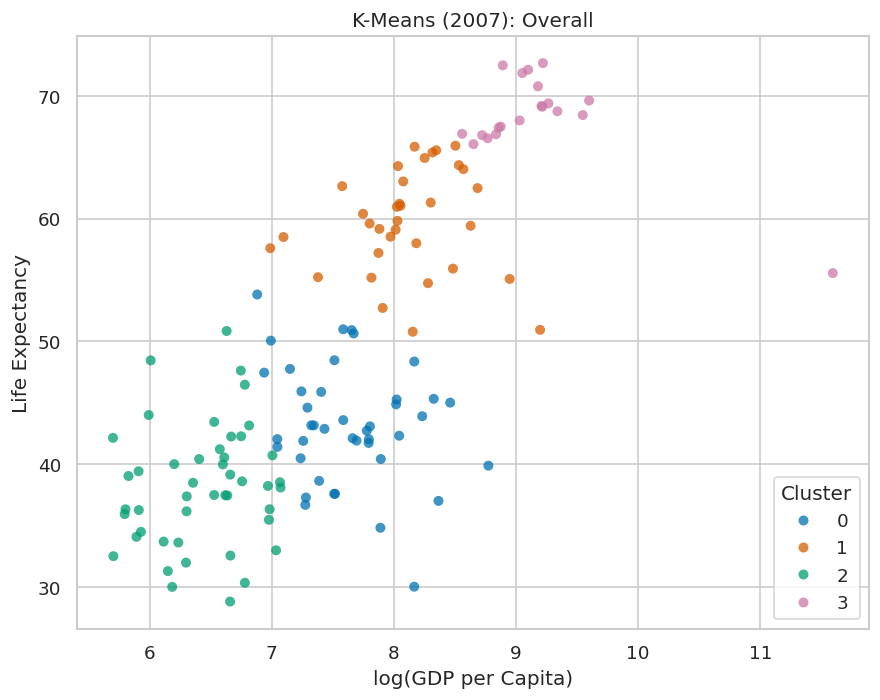

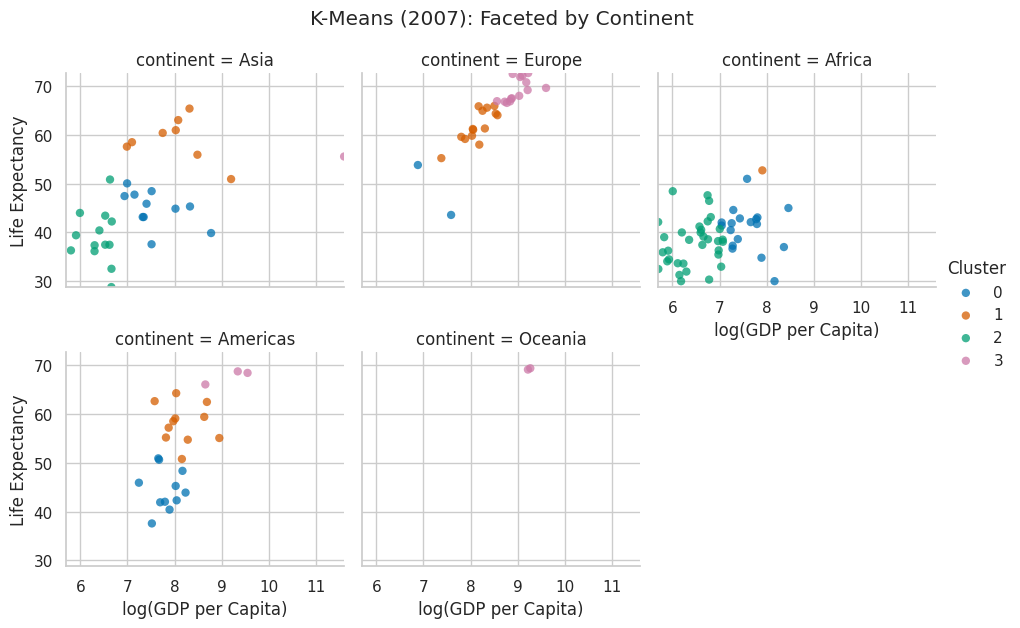

In [15]:
# =========================
# OPTION A — SINGLE YEAR
# =========================
df_cluster_A = build_df_cluster(df, mode="single_year", year=1952)
df_cluster_A, km_A, sil_A = fit_kmeans(df_cluster_A, n_clusters=4)

print(f"[A] Single year (2007) — silhouette: {sil_A:.3f}  |  n={len(df_cluster_A)}")
plot_clusters(df_cluster_A, title_prefix="K-Means (2007)")

[B] Latest per country — silhouette: 0.479  |  n=142


/tmp/ipython-input-449860073.py:46: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax = sns.scatterplot(


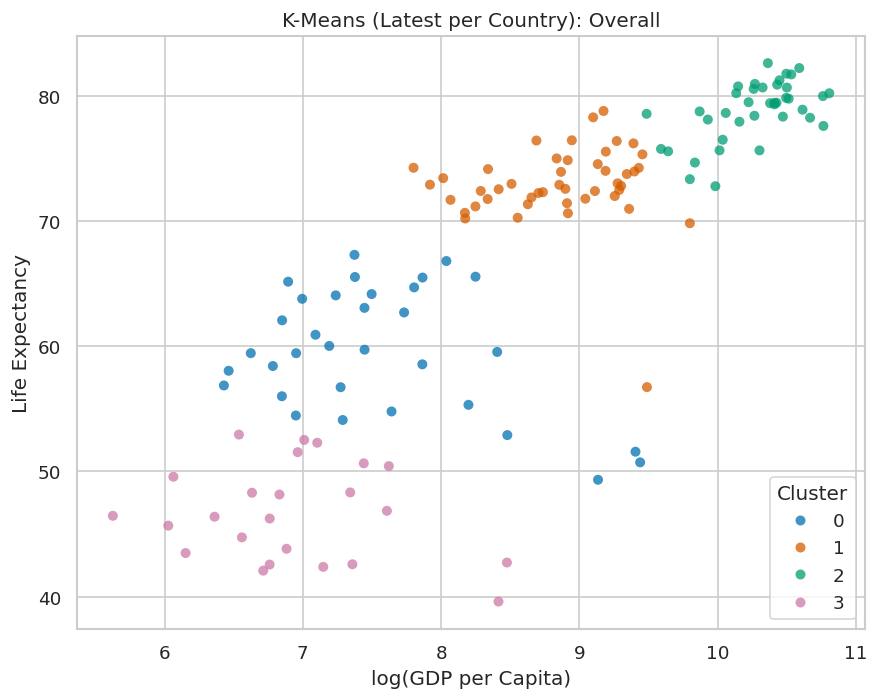

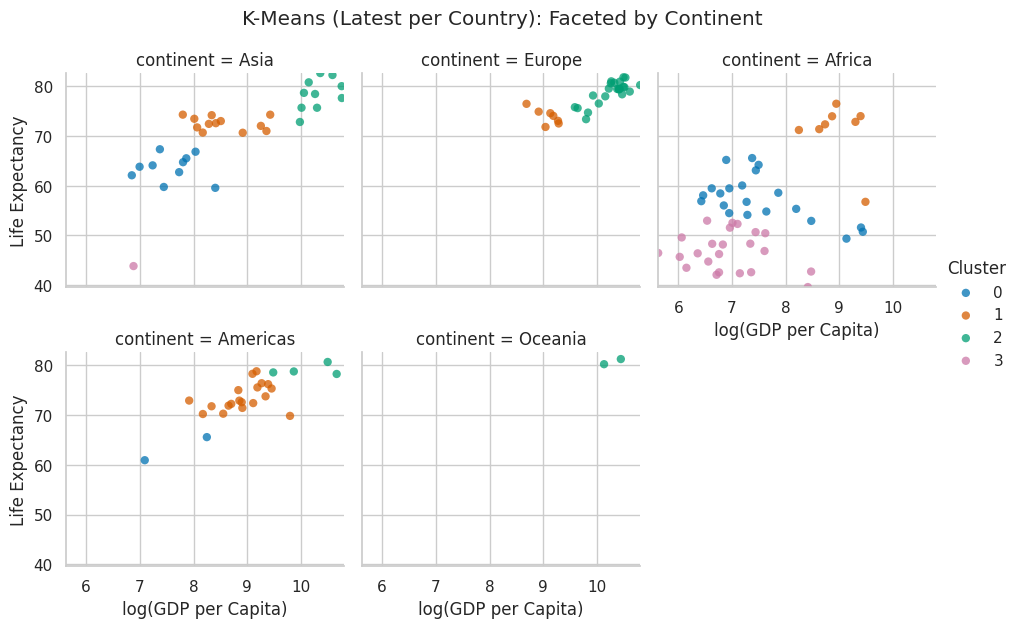

In [16]:
# =========================
# OPTION B — LATEST PER COUNTRY
# =========================
df_cluster_B = build_df_cluster(df, mode="latest_per_country")
df_cluster_B, km_B, sil_B = fit_kmeans(df_cluster_B, n_clusters=4)

print(f"[B] Latest per country — silhouette: {sil_B:.3f}  |  n={len(df_cluster_B)}")
plot_clusters(df_cluster_B, title_prefix="K-Means (Latest per Country)")


In [ ]:
# 1) Install Libraries
!pip install plotly scikit-learn

# 2) Imports
import plotly.express as px

# 3) Log-transform gdpPercap to reduce skew
df['gdpPercap_log'] = np.log(df['gdpPercap'])

# 4) K-Means Clustering (2 features: log(GDP), lifeExp)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['gdpPercap_log', 'lifeExp']])

# 5) Interactive Plot with Plotly
fig = px.scatter(
    df,
    x='gdpPercap_log',
    y='lifeExp',
    color='cluster',         # color points by cluster
    symbol='continent',      # use different symbols for continents
    hover_name='country',    # hover shows country name
    title='K-Means Clusters (GDP vs. Life Expectancy)'
)

# 6) Show the figure (interactive)
fig.show()


## Interactive Visualisations (Plotly)

### Gapminder-style bubble animation

In [ ]:
# 1. Create an animated scatter (bubble) plot
fig = px.scatter(
    data_frame=df,
    x="gdpPercap",
    y="lifeExp",
    size="pop",
    color="continent",
    animation_frame="year",
    animation_group="country",
    hover_name="country",        # Shows country name on hover
    log_x=True,                  # Log scale for GDP (typical for Gapminder)
    size_max=60,                 # Control the largest bubble size
    range_x=[100, 100000],       # Approx range of GDP (log scale)
    range_y=[20, 90],            # Approx range for life expectancy
    title="Gapminder-Style Bubble Chart Over Time"
)

fig.update_layout(
    xaxis_title="GDP per Capita (log scale)",
    yaxis_title="Life Expectancy"
)

# 2. Display the interactive figure
fig.show()


### Faceted bubble animation by continent

In [ ]:
fig = px.scatter(
    df,
    x="gdpPercap",
    y="lifeExp",
    size="pop",
    color="continent",
    facet_col="continent",
    animation_frame="year",
    animation_group="country",
    hover_name="country",
    log_x=True,                  # Log scale for GDP
    size_max=60
)

# Manually update y-axis range for each facet
fig.update_yaxes(range=[20, 90])  # Adjust these as needed
fig.update_layout(
    title="GDP per Capita vs. Life Expectancy, Faceted by Continent",
    xaxis_title="GDP per Capita (log scale)",
    yaxis_title="Life Expectancy"
)
fig.show()


### Top 10 Populations Over Time

In [ ]:
# 1. For each year, pick the 10 largest populations
df_top10 = df.groupby("year").apply(
    lambda g: g.nlargest(10, "pop")
).reset_index(drop=True)

# 2. Animated horizontal bar chart
fig = px.bar(
    df_top10,
    x="pop",
    y="country",
    color="continent",
    orientation='h',         # horizontal bars
    animation_frame="year",
    range_x=[0, df["pop"].max() * 1.1],
    title="Top 10 Populations Over Time"
)

# 3. Reverse the y-axis so the biggest bar is at the top
fig.update_layout(
    xaxis_title="Population",
    yaxis_title="Country",
    yaxis=dict(autorange="reversed")
)

fig.show()


<ipython-input-25-99694bbf978e>:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
# 1. Sort by year ascending, population descending
df_top10 = df_top10.sort_values(["year", "pop"], ascending=[True, False])

# 2. Create a rank column
df_top10["rank"] = df_top10.groupby("year")["pop"].rank(
    method="first", ascending=False
).astype(int)

# 3. (Optional) Create a combined label, e.g., "1. China"
df_top10["country_label"] = df_top10["rank"].astype(str) + ". " + df_top10["country"]

# 4. Animated bar chart
fig = px.bar(
    df_top10,
    x="pop",
    y="country_label",      # We'll use our custom label
    color="continent",
    orientation='h',
    animation_frame="year",
    range_x=[0, df["pop"].max() * 1.1],
    title="Top 10 Populations Over Time",
    text="rank"             # Show rank number on the bars
)

# 6. Reverse the y-axis so largest population is at the top
fig.update_layout(
    xaxis_title="Population",
    yaxis_title="",
    yaxis=dict(autorange="reversed")
)

# 7. Customize how the rank label is displayed on bars
fig.update_traces(textposition="inside")  # or "outside", "auto", etc.

fig.show()


<ipython-input-28-e5e1bfa224fc>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
import plotly.graph_objects as go

df_top10 = (
    df.groupby("year")
    .apply(lambda g: g.nlargest(10, "pop"))  # top 10 by pop each year
    .reset_index(drop=True)
)

# Sort so largest is first => ensures bar #1 is at the top when we reverse the y-axis
df_top10 = df_top10.sort_values(["year", "pop"], ascending=[True, False])

# Create a rank column (1 = largest)
df_top10["rank"] = df_top10.groupby("year")["pop"].rank(
    method="first", ascending=False
).astype(int)

import plotly.graph_objects as go

# Prepare a color map for continents (optional)
color_map = {
    'Africa': '#8c564b',
    'Americas': '#2ca02c',
    'Asia': '#d62728',
    'Europe': '#1f77b4',
    'Oceania': '#9467bd'
}

# Gather unique years in ascending order
years = sorted(df_top10['year'].unique())

# Find overall max population for axis range
max_pop = df_top10['pop'].max()

# Build an empty figure
fig = go.Figure(
    layout=go.Layout(
        xaxis=dict(range=[0, max_pop * 1.1], autorange=False),
        yaxis=dict(autorange='reversed'),  # Largest at the top
        title_text="Top 10 Populations Over Time (Dynamic Text Position)",
        height=600
    )
)

# Function to create a single frame's bar data
def make_bar_data_for_year(year_val):
    dff = df_top10[df_top10['year'] == year_val].copy()
    # The DataFrame is sorted so the largest pop is first
    # bar_y => array of country names in order (largest to smallest)
    bar_y = dff['country'].values
    bar_x = dff['pop'].values

    # Build a color array from each row's continent
    bar_colors = [color_map.get(cont, '#333333') for cont in dff['continent']]

    # We'll display the rank as text. You could also use country name, etc.
    bar_text = [f"Rank {r}" for r in dff['rank']]

    # Position the text 'outside' if rank=1, else 'inside'
    text_positions = np.where(dff['rank'] == 1, 'outside', 'inside')

    # Return a single bar trace
    return go.Bar(
        x=bar_x,
        y=bar_y,
        orientation='h',
        text=bar_text,
        textposition=text_positions,
        marker=dict(color=bar_colors),
        hovertext=dff['country'],   # or any other detail you want on hover
        hoverinfo='x+text+name'     # x => population, text => rank, name => trace name
    )

# 1) Add initial data (for the first year) to the figure
initial_year = years[0]
fig.add_trace(make_bar_data_for_year(initial_year))

# 2) Create frames for each subsequent year
frames = []
for yr in years:
    frame_data = [make_bar_data_for_year(yr)]
    frames.append(go.Frame(data=frame_data, name=str(yr)))

fig.frames = frames

# 3) Add animation controls (Play button)
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            x=1.13, y=1.15,
            buttons=[
                dict(
                    label='Play',
                    method='animate',
                    args=[None, {
                        "frame": {"duration": 1000, "redraw": True},
                        "fromcurrent": True,
                        "transition": {"duration": 500, "easing": "linear"}
                    }]
                )
            ]
        )
    ],
    xaxis_title="Population",
    yaxis_title="",
)

fig.show()


<ipython-input-30-f59b1c775709>:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



## Pairplots

Exploring Variable Relationships

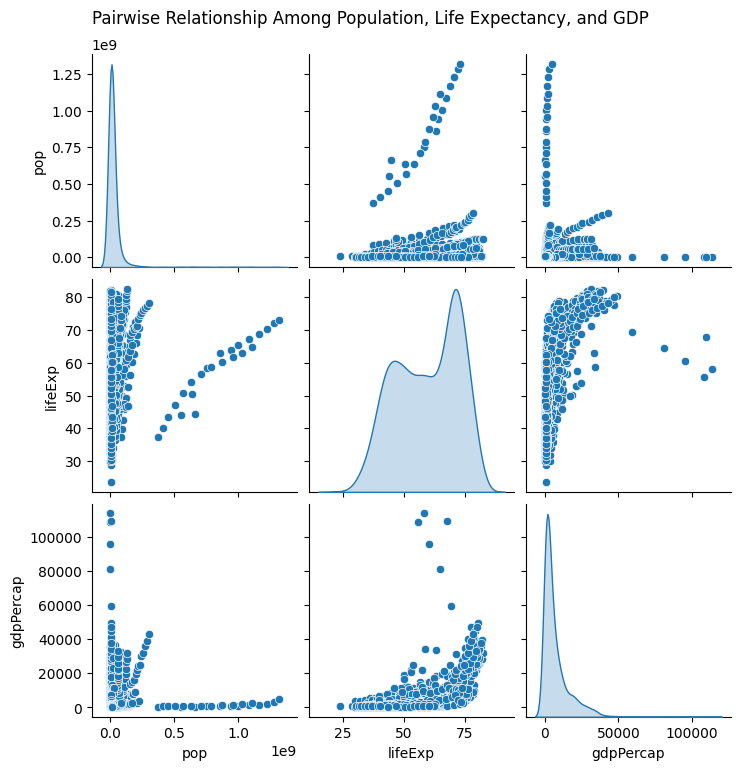

In [ ]:
vars_to_plot = ['pop', 'lifeExp', 'gdpPercap']
sns.pairplot(df[vars_to_plot], diag_kind='kde')
plt.suptitle("Pairwise Relationship Among Population, Life Expectancy, and GDP", y=1.02)
plt.show()


# Regression Modeling

In [27]:
from sklearn.linear_model import LinearRegression

# -----------------------------------------
# 1) Load and Prepare the Data
# -----------------------------------------
# 1A. Average life expectancy by continent & year
df_cont = df.groupby(['continent', 'year'], as_index=False)['lifeExp'].mean()

# 1B. For China, India, USA, we can filter them directly
df_countries = df[df['country'].isin(['China', 'India', 'United States'])].copy()

# Years we want to predict
future_years = np.array([2012, 2017]).reshape(-1, 1)

# -----------------------------------------
# 2) Predict By Continent
# -----------------------------------------
continent_predictions = {}

# Get list of unique continents
continents = df_cont['continent'].unique()

for c in continents:
    subset = df_cont[df_cont['continent'] == c].copy()

    # X = years, y = average lifeExp
    X = subset[['year']]       # shape (12,1) for 1952..2007
    y = subset['lifeExp']      # shape (12,)

    # Train a simple linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Predict for 2012, 2017
    preds = model.predict(future_years)

    # Store results
    # preds is an array of shape (2,) => [pred_for_2012, pred_for_2017]
    continent_predictions[c] = {
        2012: preds[0],
        2017: preds[1]
    }

# -----------------------------------------
# 3) Predict for China, India, USA
# -----------------------------------------
country_predictions = {}

for country in ['China', 'India', 'United States']:
    subset = df_countries[df_countries['country'] == country].copy()

    X = subset[['year']]
    y = subset['lifeExp']

    model = LinearRegression()
    model.fit(X, y)

    preds = model.predict(future_years)
    country_predictions[country] = {
        2012: preds[0],
        2017: preds[1]
    }

# -----------------------------------------
# 4) Display Results
# -----------------------------------------
print("=== Predicted Average Life Expectancy by Continent ===")
for c in continents:
    vals = continent_predictions[c]
    print(f"{c} => 2012: {vals[2012]:.2f}, 2017: {vals[2017]:.2f}")

print("\n=== Predicted Life Expectancy for China, India, USA ===")
for country in ['China', 'India', 'United States']:
    vals = country_predictions[country]
    print(f"{country} => 2012: {vals[2012]:.2f}, 2017: {vals[2017]:.2f}")


=== Predicted Average Life Expectancy by Continent ===
Africa => 2012: 58.28, 2017: 59.72
Americas => 2012: 76.61, 2017: 78.45
Asia => 2012: 74.79, 2017: 77.06
Europe => 2012: 79.12, 2017: 80.23
Oceania => 2012: 81.16, 2017: 82.21

=== Predicted Life Expectancy for China, India, USA ===
China => 2012: 79.03, 2017: 81.69
India => 2012: 69.59, 2017: 72.12
United States => 2012: 79.46, 2017: 80.38


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

## 1. Load & Prepare the Data

In [37]:
# 1A. Created a grouped DataFrame for continents & year
# 1A. Average life expectancy by continent & year
df_cont = df.groupby(['continent', 'year'], as_index=False)['lifeExp'].mean()

# 1B. For China, India, USA, we can filter them directly
df_countries = df[df['country'].isin(['China', 'India', 'United States'])].copy()

# We will predict for these future years:
future_years = pd.DataFrame({'year': [2012, 2017]})

# Note: We'll add a constant column before predicting.


## 2. Predictions

### 2A. Predict by Continent

In [38]:
# -----------------------------------------
# 2) Predict By Continent
# -----------------------------------------
continent_predictions = {}

# Get list of unique continents
continents = df_cont['continent'].unique()

for c in continents:
    subset = df_cont[df_cont['continent'] == c].copy()

    # X = years, y = average lifeExp
    X = subset[['year']]       # shape (12,1) for 1952..2007
    y = subset['lifeExp']      # shape (12,)

    # Train a simple linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Predict for 2012, 2017
    preds = model.predict(future_years)

    # Store results
    # preds is an array of shape (2,) => [pred_for_2012, pred_for_2017]
    continent_predictions[c] = {
        2012: preds[0],
        2017: preds[1]
    }

# -----------------------------------------
# 4) Display Results
# -----------------------------------------
print("=== Predicted Average Life Expectancy by Continent ===")
for c in continents:
    vals = continent_predictions[c]
    print(f"{c} => 2012: {vals[2012]:.2f}, 2017: {vals[2017]:.2f}")

=== Predicted Average Life Expectancy by Continent ===
Africa => 2012: 58.28, 2017: 59.72
Americas => 2012: 76.61, 2017: 78.45
Asia => 2012: 74.79, 2017: 77.06
Europe => 2012: 79.12, 2017: 80.23
Oceania => 2012: 81.16, 2017: 82.21


### 2B. Predict for China, India, and the USA

In [39]:
# -----------------------------------------
# 3) Predict for China, India, USA
# -----------------------------------------
country_predictions = {}

for country in ['China', 'India', 'United States']:
    subset = df_countries[df_countries['country'] == country].copy()

    X = subset[['year']]
    y = subset['lifeExp']

    model = LinearRegression()
    model.fit(X, y)

    preds = model.predict(future_years)
    country_predictions[country] = {
        2012: preds[0],
        2017: preds[1]
    }
# -----------------------------------------
# 4) Display Results
# -----------------------------------------
print("\n=== Predicted Life Expectancy for China, India, USA ===")
for country in ['China', 'India', 'United States']:
    vals = country_predictions[country]
    print(f"{country} => 2012: {vals[2012]:.2f}, 2017: {vals[2017]:.2f}")


=== Predicted Life Expectancy for China, India, USA ===
China => 2012: 79.03, 2017: 81.69
India => 2012: 69.59, 2017: 72.12
United States => 2012: 79.46, 2017: 80.38


In [40]:
country_predictions = {}
country_pvalues = {}

# Filter to the countries of interest
target_countries = ["China", "India", "United States"]
df_countries = df[df['country'].isin(target_countries)].copy()

for country in target_countries:
    subset = df_countries[df_countries['country'] == country].copy()

    X = subset[['year']]
    y = subset['lifeExp']

    # Add intercept
    X = sm.add_constant(X)

    # Fit OLS
    model = sm.OLS(y, X).fit()

    # Prepare the future years input
    future_input = future_years.copy()
    future_input = sm.add_constant(future_input)

    preds = model.predict(future_input)

    # Store
    country_predictions[country] = {
        2012: preds.iloc[0],
        2017: preds.iloc[1]
    }
    country_pvalues[country] = model.pvalues.to_dict()

# Display results
print("\n=== Country Predictions (China, India, USA) ===")
for country in target_countries:
    vals = country_predictions[country]
    pvals = country_pvalues[country]
    print(f"{country}: 2012 => {vals[2012]:.2f}, 2017 => {vals[2017]:.2f}")
          # f"p-value(year)={pvals['year']:.4g}")



=== Country Predictions (China, India, USA) ===
China: 2012 => 79.03, 2017 => 81.69
India: 2012 => 69.59, 2017 => 72.12
United States: 2012 => 79.46, 2017 => 80.38


## 3. Model Performance (R², RMSE)

In [44]:
# To suppress any future warnings we might not want:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

continent_results = []

for c in df_cont['continent'].unique():
    # 1) Subset data for this continent
    subset = df_cont[df_cont['continent'] == c].copy()

    # 2) Prepare X (with intercept) and y
    #    Statsmodels typically wants a constant added explicitly.
    X = sm.add_constant(subset[['year']])  # shape (n, 2)
    y = subset['lifeExp']                  # shape (n,)

    # 3) Fit an OLS model
    model = sm.OLS(y, X).fit()

    # 4) Model Fit Metrics
    r2 = model.rsquared
    # Compute RMSE
    residuals = y - model.predict(X)
    rmse = np.sqrt(np.mean(residuals**2))

    # 5) Confidence Intervals for the slope & intercept
    conf_int = model.conf_int(alpha=0.05)  # 95% CI
    # conf_int is a DataFrame with rows = ['const', 'year'] and columns = [0, 1] for lower/upper

    # 6) Predict for 2012 & 2017, including confidence & prediction intervals
    #    a) Build a DataFrame with the same columns as X (const + year)
    X_future = sm.add_constant(future_years.copy())
    #    b) Get a prediction object
    pred_obj = model.get_prediction(X_future)
    #    c) Summary frame includes mean, mean_se, mean_ci, obs_ci (prediction intervals)
    pred_df = pred_obj.summary_frame(alpha=0.05)  # 95% intervals

    # pred_df columns:
    # ['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper', 'obs_ci_lower', 'obs_ci_upper']

    # 7) Print or store the results
    # For demonstration, let's just store them in a list
    continent_results.append({
        'continent': c,
        'r2': r2,
        'rmse': rmse,
        'slope_ci': (conf_int.loc['year', 0], conf_int.loc['year', 1]),
        'pred_2012': pred_df.iloc[0]['mean'],
        'pred_2012_mean_ci': (pred_df.iloc[0]['mean_ci_lower'], pred_df.iloc[0]['mean_ci_upper']),
        'pred_2012_obs_ci': (pred_df.iloc[0]['obs_ci_lower'], pred_df.iloc[0]['obs_ci_upper']),
        'pred_2017': pred_df.iloc[1]['mean'],
        'pred_2017_mean_ci': (pred_df.iloc[1]['mean_ci_lower'], pred_df.iloc[1]['mean_ci_upper']),
        'pred_2017_obs_ci': (pred_df.iloc[1]['obs_ci_lower'], pred_df.iloc[1]['obs_ci_upper'])
    })

# Now display the results in a readable format
for res in continent_results:
    c = res['continent']
    print(f"=== {c} ===")
    print(f" R^2: {res['r2']:.3f}, RMSE: {res['rmse']:.2f}")
    print(f" Slope 95% CI: {res['slope_ci']}")
    print(f" 2012 Predicted LifeExp (mean): {res['pred_2012']:.2f} "
          f"[Mean CI: {res['pred_2012_mean_ci'][0]:.2f}, {res['pred_2012_mean_ci'][1]:.2f}] "
          f"[Obs CI: {res['pred_2012_obs_ci'][0]:.2f}, {res['pred_2012_obs_ci'][1]:.2f}]")
    print(f" 2017 Predicted LifeExp (mean): {res['pred_2017']:.2f} "
          f"[Mean CI: {res['pred_2017_mean_ci'][0]:.2f}, {res['pred_2017_mean_ci'][1]:.2f}] "
          f"[Obs CI: {res['pred_2017_obs_ci'][0]:.2f}, {res['pred_2017_obs_ci'][1]:.2f}]")
    print()



=== Africa ===
 R^2: 0.919, RMSE: 1.48
 Slope 95% CI: (np.float64(0.22914845688187518), np.float64(0.34991006920742745))
 2012 Predicted LifeExp (mean): 58.28 [Mean CI: 56.05, 60.50] [Obs CI: 54.04, 62.51]
 2017 Predicted LifeExp (mean): 59.72 [Mean CI: 57.23, 62.22] [Obs CI: 55.34, 64.11]

=== Americas ===
 R^2: 0.989, RMSE: 0.66
 Slope 95% CI: (np.float64(0.3407827895197536), np.float64(0.39451908460613083))
 2012 Predicted LifeExp (mean): 76.61 [Mean CI: 75.62, 77.60] [Obs CI: 74.72, 78.49]
 2017 Predicted LifeExp (mean): 78.45 [Mean CI: 77.34, 79.55] [Obs CI: 76.49, 80.40]

=== Asia ===
 R^2: 0.984, RMSE: 1.01
 Slope 95% CI: (np.float64(0.41207934797358153), np.float64(0.49416545982469445))
 2012 Predicted LifeExp (mean): 74.79 [Mean CI: 73.28, 76.30] [Obs CI: 71.91, 77.67]
 2017 Predicted LifeExp (mean): 77.06 [Mean CI: 75.36, 78.75] [Obs CI: 74.07, 80.04]

=== Europe ===
 R^2: 0.980, RMSE: 0.55
 Slope 95% CI: (np.float64(0.1993141810936817), np.float64(0.24455010795061238))
 2012

In [45]:
# 1) Filter for the countries of interest
target_countries = ["China", "India", "United States"]
df_countries = df[df['country'].isin(target_countries)].copy()

# 2) Group by (country, year) to get average lifeExp if needed
# (If your data is already one row per year per country, you can skip grouping.)
df_countries_grouped = df_countries.groupby(['country', 'year'], as_index=False)['lifeExp'].mean()

# 3) Prepare a DataFrame for future years
future_years = pd.DataFrame({'year': [2012, 2017]})

print("=== Predictions for China, India, USA ===\n")

for country in target_countries:
    # 4) Subset the grouped data for this country
    subset = df_countries_grouped[df_countries_grouped['country'] == country].copy()

    # 5) Prepare X (with intercept) and y
    X = sm.add_constant(subset[['year']])  # shape ~ (12,2) if 1952..2007
    y = subset['lifeExp']

    # 6) Fit OLS
    model = sm.OLS(y, X).fit()

    # 7) Model fit metrics: R-squared, RMSE
    r2 = model.rsquared
    residuals = y - model.predict(X)
    rmse = np.sqrt(np.mean(residuals**2))

    # 8) Confidence interval for slope & intercept
    conf_int = model.conf_int(alpha=0.05)

    # 9) Predictions for 2012, 2017 with confidence & prediction intervals
    X_future = sm.add_constant(future_years.copy())
    pred_obj = model.get_prediction(X_future)
    pred_df = pred_obj.summary_frame(alpha=0.05)  # 95% intervals

    # Extract values for readability
    pred_2012_mean = pred_df.iloc[0]['mean']
    pred_2012_mean_ci = (pred_df.iloc[0]['mean_ci_lower'], pred_df.iloc[0]['mean_ci_upper'])
    pred_2012_obs_ci = (pred_df.iloc[0]['obs_ci_lower'], pred_df.iloc[0]['obs_ci_upper'])

    pred_2017_mean = pred_df.iloc[1]['mean']
    pred_2017_mean_ci = (pred_df.iloc[1]['mean_ci_lower'], pred_df.iloc[1]['mean_ci_upper'])
    pred_2017_obs_ci = (pred_df.iloc[1]['obs_ci_lower'], pred_df.iloc[1]['obs_ci_upper'])

    # 10) Print results
    print(f"--- {country} ---")
    print(f" R^2: {r2:.3f}, RMSE: {rmse:.2f}")
    print(f" Slope 95% CI: {conf_int.loc['year'].values}")
    print(f" 2012 Predicted LifeExp (mean): {pred_2012_mean:.2f} "
          f"[Mean CI: {pred_2012_mean_ci[0]:.2f}, {pred_2012_mean_ci[1]:.2f}] "
          f"[Obs CI: {pred_2012_obs_ci[0]:.2f}, {pred_2012_obs_ci[1]:.2f}]")
    print(f" 2017 Predicted LifeExp (mean): {pred_2017_mean:.2f} "
          f"[Mean CI: {pred_2017_mean_ci[0]:.2f}, {pred_2017_mean_ci[1]:.2f}] "
          f"[Obs CI: {pred_2017_obs_ci[0]:.2f}, {pred_2017_obs_ci[1]:.2f}]")
    print()


=== Predictions for China, India, USA ===

--- China ---
 R^2: 0.871, RMSE: 3.52
 Slope 95% CI: [0.38698308 0.67444663]
 2012 Predicted LifeExp (mean): 79.03 [Mean CI: 73.74, 84.32] [Obs CI: 68.94, 89.12]
 2017 Predicted LifeExp (mean): 81.69 [Mean CI: 75.75, 87.62] [Obs CI: 71.24, 92.13]

--- India ---
 R^2: 0.968, RMSE: 1.57
 Slope 95% CI: [0.44104237 0.56959959]
 2012 Predicted LifeExp (mean): 69.59 [Mean CI: 67.22, 71.95] [Obs CI: 65.08, 74.10]
 2017 Predicted LifeExp (mean): 72.12 [Mean CI: 69.46, 74.77] [Obs CI: 67.45, 76.79]

--- United States ---
 R^2: 0.986, RMSE: 0.38
 Slope 95% CI: [0.16866189 0.19967657]
 2012 Predicted LifeExp (mean): 79.46 [Mean CI: 78.89, 80.03] [Obs CI: 78.38, 80.55]
 2017 Predicted LifeExp (mean): 80.38 [Mean CI: 79.74, 81.03] [Obs CI: 79.26, 81.51]



In [46]:
# Confidence Intervals (for the regression line itself); Prediction Intervals (for new data points);
# R-squared or RMSE (to show how well the model fit historical data) for both continent predictions and
# country predictions

from sklearn.linear_model import LinearRegression
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Assuming 'df' is your DataFrame and the necessary columns exist

# Function to calculate confidence and prediction intervals, R-squared, and RMSE
def analyze_model(X, y, model):
    predictions = model.predict(X)
    prstd, iv_l, iv_u = wls_prediction_std(model)  # Prediction intervals

    # Confidence Intervals for regression line
    ci_lower = model.get_prediction(X).conf_int()[:, 0]
    ci_upper = model.get_prediction(X).conf_int()[:, 1]

    rmse = np.sqrt(np.mean((y - predictions)**2))
    r_squared = model.rsquared

    return predictions, prstd, iv_l, iv_u, ci_lower, ci_upper, rmse, r_squared


# Continent Predictions
continent_predictions_data = {}
for continent in df['continent'].unique():
    continent_df = df[df['continent'] == continent]
    X = continent_df[['year']]
    X = sm.add_constant(X)  # Add intercept
    y = continent_df['lifeExp']
    model = sm.OLS(y, X).fit()
    predictions, prstd, iv_l, iv_u, ci_lower, ci_upper, rmse, r_squared = analyze_model(X, y, model)
    continent_predictions_data[continent] = {
        'predictions': predictions,
        'prstd': prstd, 'iv_l': iv_l, 'iv_u': iv_u,
        'ci_lower': ci_lower, 'ci_upper': ci_upper,
        'rmse': rmse, 'r_squared': r_squared
    }
    print(f"Continent: {continent}")
    print(f"  RMSE: {rmse:.2f}, R-squared: {r_squared:.2f}")


# Country Predictions
countries = ['China', 'India', 'United States']
country_predictions_data = {}
for country in countries:
    country_df = df[df['country'] == country]
    X = country_df[['year']]
    X = sm.add_constant(X)  # Add intercept
    y = country_df['lifeExp']
    model = sm.OLS(y, X).fit()
    predictions, prstd, iv_l, iv_u, ci_lower, ci_upper, rmse, r_squared = analyze_model(X, y, model)
    country_predictions_data[country] = {
        'predictions': predictions,
        'prstd': prstd, 'iv_l': iv_l, 'iv_u': iv_u,
        'ci_lower': ci_lower, 'ci_upper': ci_upper,
        'rmse': rmse, 'r_squared': r_squared
    }
    print(f"Country: {country}")
    print(f"  RMSE: {rmse:.2f}, R-squared: {r_squared:.2f}")


Continent: Asia
  RMSE: 8.90, R-squared: 0.44
Continent: Europe
  RMSE: 3.84, R-squared: 0.50
Continent: Africa
  RMSE: 7.66, R-squared: 0.30
Continent: Americas
  RMSE: 6.84, R-squared: 0.46
Continent: Oceania
  RMSE: 0.80, R-squared: 0.95
Country: China
  RMSE: 3.52, R-squared: 0.87
Country: India
  RMSE: 1.57, R-squared: 0.97
Country: United States
  RMSE: 0.38, R-squared: 0.99


In [47]:
import statsmodels.api as sm
continent_predictions = {}
# continent_pvalues = {}

for c in df_cont['continent'].unique():
    # Subset data for this continent
    subset = df_cont[df_cont['continent'] == c].copy()

    # Prepare X (years) and y (average lifeExp)
    X = subset[['year']]            # shape ~ (12,1)
    y = subset['lifeExp']           # shape ~ (12,)

    # Add a constant for the intercept
    X = sm.add_constant(X)          # shape ~ (12,2)

    # Fit OLS model
    model = sm.OLS(y, X).fit()


    # Predict for future years
    # 2A. Add constant to future_years
    future_input = future_years.copy()
    future_input = sm.add_constant(future_input)
    # 2B. Predict
    preds = model.predict(future_input)
    # preds is an array-like with length = 2 (for 2012, 2017)

    # Store results
    continent_predictions[c] = {
        2012: preds.iloc[0],
        2017: preds.iloc[1]
    }
    # continent_pvalues[c] = pvals

# Display results
print("=== Continent Predictions ===")
for c in continent_predictions:
    print(f"{c}: 2012 => {continent_predictions[c][2012]:.2f}, "
          f"2017 => {continent_predictions[c][2017]:.2f} ")
          # f"p-value(year)={continent_pvalues[c]['year']:.4g}")


=== Continent Predictions ===
Africa: 2012 => 58.28, 2017 => 59.72 
Americas: 2012 => 76.61, 2017 => 78.45 
Asia: 2012 => 74.79, 2017 => 77.06 
Europe: 2012 => 79.12, 2017 => 80.23 
Oceania: 2012 => 81.16, 2017 => 82.21 


## 4. OLS Regression Results


In [48]:
import statsmodels.api as sm
# Let's try predicting lifeExp from log(GDP per capita)
df['log_gdpPercap'] = df['gdpPercap'].apply(lambda x: np.log(x))

X = df[['log_gdpPercap']]  # predictor
X = sm.add_constant(X)      # intercept
y = df['lifeExp']           # target

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3192.
Date:                Fri, 19 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:47:31   Log-Likelihood:                -5877.2
No. Observations:                1704   AIC:                         1.176e+04
Df Residuals:                    1702   BIC:                         1.177e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.1009      1.228     -7.413

In [49]:
# Linear regression between gdp per capita and life expectancy


# Prepare the data
X = df[['log_gdpPercap']]  # predictor
X = sm.add_constant(X)      # Add intercept term
y = df['lifeExp']           # target

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# You can access specific statistics from the model:
print("\nCoefficients:", model.params)
print("\nR-squared:", model.rsquared)
print("\nP-values:", model.pvalues)

# Make predictions
predictions = model.predict(X)

# Further analysis or visualization can be done using the model and predictions


                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3192.
Date:                Fri, 19 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:47:46   Log-Likelihood:                -5877.2
No. Observations:                1704   AIC:                         1.176e+04
Df Residuals:                    1702   BIC:                         1.177e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.1009      1.228     -7.413

In [50]:

continents = df_cont['continent'].unique()

for c in continents:
    # 1. Subset data for this continent
    subset = df_cont[df_cont['continent'] == c].copy()

    # 2. Separate X (predictor) and y (target)
    #    For a simple linear regression on "year" -> "lifeExp"
    X = subset['year']         # shape ~ (12,)
    y = subset['lifeExp']      # shape ~ (12,)

    # 3. Add a constant for the intercept
    X = sm.add_constant(X)     # shape ~ (12,2)

    # 4. Fit OLS model
    model = sm.OLS(y, X).fit()

    # 5. Print the full summary (including p-values)
    print(f"\n=== {c} ===")
    print(model.summary())

    # You can also directly access p-values as a Series:
    # model.pvalues['year'] would give the p-value for the 'year' slope
    # model.pvalues['const'] for the intercept



=== Africa ===
                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     114.1
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           8.64e-07
Time:                        02:47:53   Log-Likelihood:                -21.725
No. Observations:                  12   AIC:                             47.45
Df Residuals:                      10   BIC:                             48.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -524.2578     53.645    

In [51]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     354.0
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           3.90e-09
Time:                        02:47:56   Log-Likelihood:                -11.096
No. Observations:                  12   AIC:                             26.19
Df Residuals:                      10   BIC:                             27.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -341.9080     22.125    -15.454      0.0

## 5. Regression Visualisation

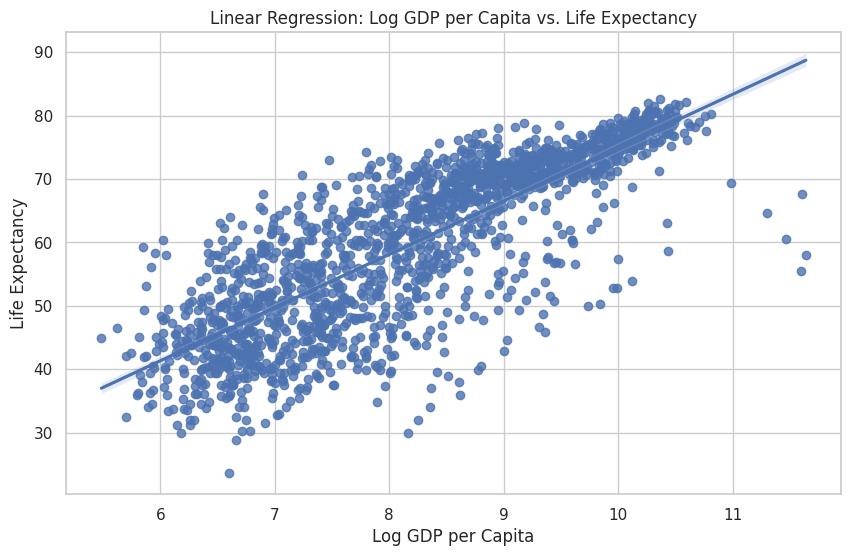

In [52]:
# prompt: plot the linear regression between gdp per capita and life expectancy


# Assuming 'df' and 'log_gdpPercap' are already defined from previous code

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='log_gdpPercap', y='lifeExp', data=df)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Linear Regression: Log GDP per Capita vs. Life Expectancy')
plt.show()


## Forecasting Life Expectancy
- Predictions for 2012 & 2017

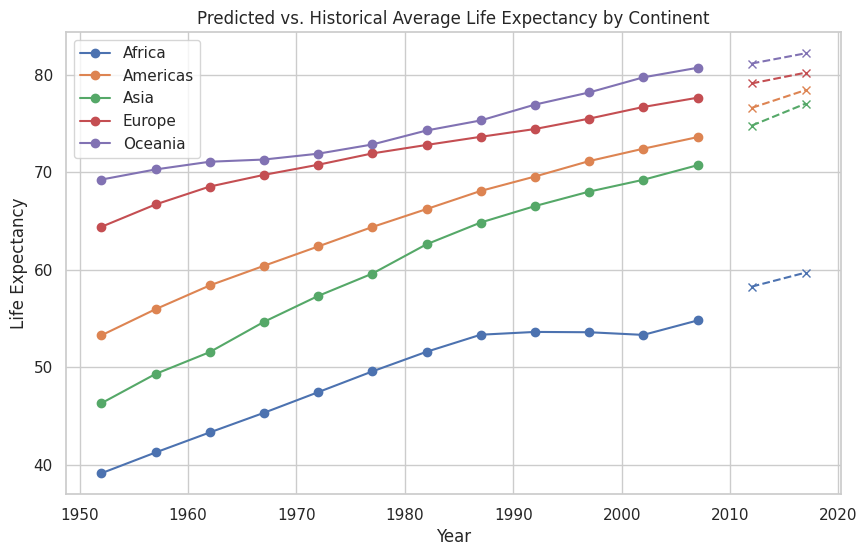

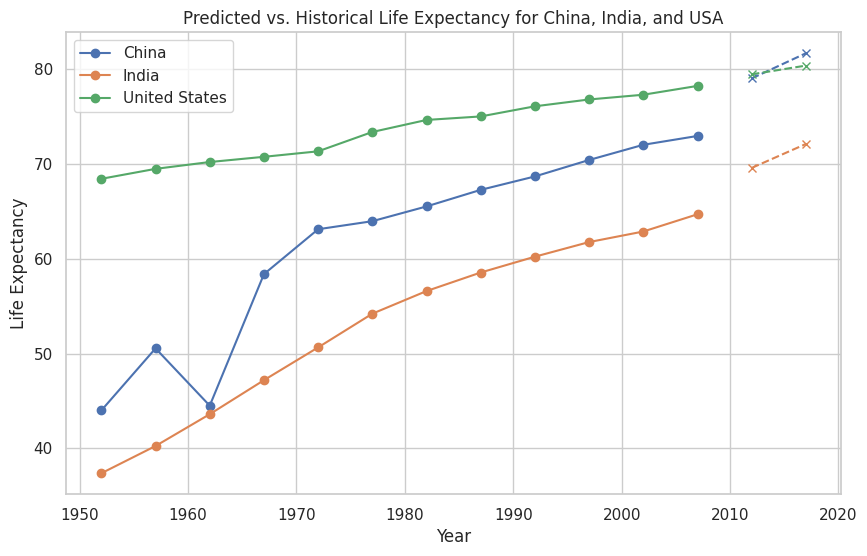

In [54]:
# A graph with the historical data coming before (keep same color for historical and predicted

import matplotlib.pyplot as plt

# --- Plot for continents ---
plt.figure(figsize=(10, 6))

for continent, predictions in continent_predictions.items():
    # Historical data
    historical_data = df_cont[df_cont['continent'] == continent]
    plt.plot(historical_data['year'], historical_data['lifeExp'], label=continent, marker='o')

    # Predicted data
    plt.plot([2012, 2017], [predictions[2012], predictions[2017]], marker='x', linestyle='--', color=plt.gca().lines[-1].get_color()) # Use same color as historical data

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Predicted vs. Historical Average Life Expectancy by Continent")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot for specific countries ---
plt.figure(figsize=(10, 6))

for country, predictions in country_predictions.items():
    # Historical data
    historical_data = df_countries[df_countries['country'] == country]
    plt.plot(historical_data['year'], historical_data['lifeExp'], label=country, marker='o')

    # Predicted data
    plt.plot([2012, 2017], [predictions[2012], predictions[2017]], marker='x', linestyle='--', color=plt.gca().lines[-1].get_color())

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Predicted vs. Historical Life Expectancy for China, India, and USA")
plt.legend()
plt.grid(True)
plt.show()


# Key Insights & Discussion

Summarize the main takeaways:

* GDP strongly correlates with life expectancy.

* Clear disparities by continent.

* Regression performance was high (R² ~ 0.98).

Relate insights to real-world implications (e.g., inequality, development).

Based on the analysis of the Gapminder dataset, here are some key insights:

*   **GDP and Life Expectancy:** There is a strong positive correlation between GDP per capita and life expectancy. Countries with higher GDP per capita generally have higher life expectancies.
*   **Continental Disparities:** Significant disparities exist in life expectancy and GDP per capita across continents. Africa generally has the lowest life expectancy, while Europe and Oceania have the highest. Economic growth trends also vary significantly by continent.
*   **Population Growth:** Asia has experienced rapid population growth over the years compared to other continents.
*   **Regression Model Performance:** The linear regression models used to predict life expectancy based on year performed well, particularly for individual countries like the United States and India, as indicated by high R-squared values (close to 1) and low RMSE values. The models for continents also showed good fits, although with some variations across regions.
*   **Clustering:** K-Means clustering based on log GDP per capita and life expectancy reveals distinct groups of countries, often aligning with continental divisions and illustrating different stages of development.

These findings highlight the complex interplay of economic, social, and geographical factors in shaping global development trends. While overall progress in life expectancy is evident, significant inequalities persist, emphasizing the need for targeted development efforts.

# Conclusion


This analysis of the Gapminder dataset has provided valuable insights into global development trends over time. We observed a strong positive correlation between GDP per capita and life expectancy, significant disparities across continents in key development indicators, and the impact of population growth. The regression modeling demonstrated the predictable nature of life expectancy trends based on historical data, while clustering helped identify distinct groups of countries with similar development profiles. Overall, the findings underscore the progress made in global health and economic development while highlighting the persistent inequalities that require continued attention.